# DS_7331 Machine Learning - Lab 1 - Group 4

### Paticia Attah
### Linda Eliasen
### Senthil Kumar

### BUSINESS UNDERSTANDING

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.







xxxxx

### DATA MEANING  & TYPE

The original dataset is the case disclosure file for the 2017 LCA Programs (H-1B, H-1B1, E-3) released by the Department of Labor.  It contained 624,650 observations and 52 informational variables.  

The dataset was trimmed to not only reduce the size but also to remove variables that did not pertain to the analysis (such as address details beyond city and state, phone numbers, salary survey source data).

The final subset of the data includes:
-  H-1B Petitions
-  FT Positions
-  Case Status of Certified, Certified-Withdrawn and Denied
-  Work States in the Contiguous US, including Alaska

The final dataset for use in the analysis contains 575,591 observations and 29 feature variables (including three engineered features as indicated in the table below).  

Original 2017 Data File:  https://www.dol.gov/agencies/eta/foreign-labor/performance


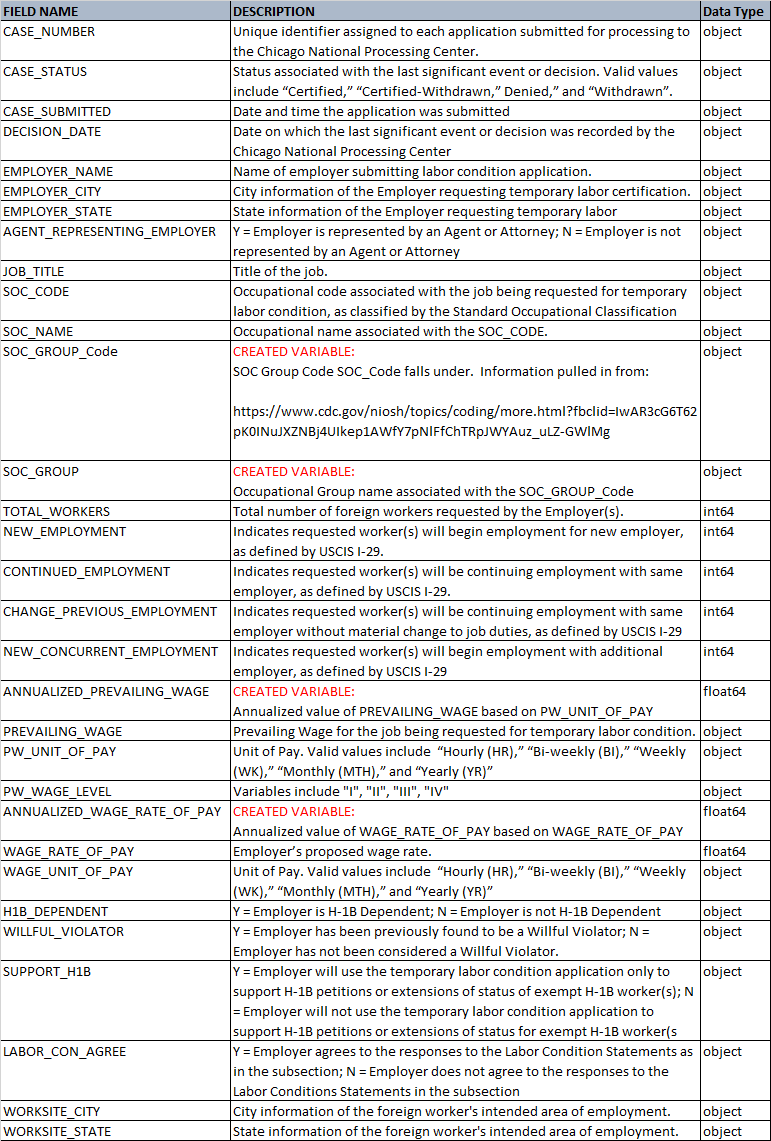

Bringing in the data

In [94]:
import pandas as pd 
import numpy as np
import plotly as py
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [95]:
df = pd.read_csv('H-1B_Data_FY17.csv')

df.head(3)

C:\Users\linda\anaconda3\envs\ML_7331\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (11,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_CODE,...,PW_WAGE_LEVEL,ANNUALIZED_WAGE_RATE_OF_PAY,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_STATE
0,I-200-17075-764873,CERTIFIED,3/16/2017,3/22/2017,BTY DENTAL GROUP LLC,ANCHORAGE,AK,Y,DENTIST,29-1021,...,Level II,165609.6,79.62,Hour,N,N,NaN,NaN,ANCHORAGE,AK
1,I-200-17083-576785,CERTIFIED,3/24/2017,3/30/2017,BTY DENTAL GROUP LLC,ANCHORAGE,AK,Y,DENTIST,29-1021,...,Level II,165609.6,79.62,Hour,N,N,NaN,N,ANCHORAGE,AK
2,I-200-17160-672299,CERTIFIED-WITHDRAWN,6/13/2017,7/26/2017,"HALLIBURTON ENERGY SERVICES, INC.",HOUSTON,TX,Y,GENERAL FIELD PROFESSIONAL - DIRECTIONAL DRILLING,17-2171,...,Level II,172800.0,172800.00,Year,N,N,NaN,NaN,PRUDHOE BAY,AK


Data Manipulation

In [47]:
# NEW COLUMN "CERTIFIED" combines certified & certified-withdrawn. 
# Both indicate the LCA Petition was approved.  Employer withdrew petition after certification.

df['CERTIFIED'] = np.where(df['CASE_STATUS']!='DENIED', 'Y','N')

In [48]:
# NEW COLUMN "PAY_ABOVE_PREV_WAGE" to calculate if wage rate is greater than or equal to prevailing wage
# Condition of certification process

df['PAY_ABOVE_PREV_WAGE'] = np.where(df['ANNUALIZED_WAGE_RATE_OF_PAY']>=df['ANNUALIZED_PREVAILING_WAGE'], '1', '0')

pay_compare = df.get(['ANNUALIZED_WAGE_RATE_OF_PAY', 'ANNUALIZED_PREVAILING_WAGE', 'PAY_ABOVE_PREV_WAGE'])
pay_compare.head(5)

pay_compare_totals_df = df.groupby(['PW_WAGE_LEVEL', 'PAY_ABOVE_PREV_WAGE']).size().reset_index(name='counts')



In [ ]:
# NEW COLUMN "DAYS_PROCESS"





In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575591 entries, 0 to 575590
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_NUMBER                  575591 non-null  object 
 1   CASE_STATUS                  575591 non-null  object 
 2   CASE_SUBMITTED               575591 non-null  object 
 3   DECISION_DATE                575591 non-null  object 
 4   EMPLOYER_NAME                575552 non-null  object 
 5   EMPLOYER_CITY                575591 non-null  object 
 6   EMPLOYER_STATE               575577 non-null  object 
 7   AGENT_REPRESENTING_EMPLOYER  488476 non-null  object 
 8   JOB_TITLE                    575589 non-null  object 
 9   SOC_CODE                     575591 non-null  object 
 10  SOC_NAME                     575590 non-null  object 
 11  SOC_GROUP_Code               575591 non-null  object 
 12  SOC_GROUP                    575585 non-null  object 
 13 

### DATA QUALITY

Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

LINDA - EXCEL

In [ ]:
PATRCIA - PYTHON PORTION

### SIMPLE STATISTICS

In [10]:
#Subset of count variables for summary statistics chart  ERROR UNTIL DAYS_PROCESS IS ADDED ABOVE

dfssc = pd.DataFrame([df.TOTAL_WORKERS, df.NEW_EMPLOYMENT, df.CONTINUED_EMPLOYMENT, df.DAYS_PROCESS]).transpose()
dfssc.describe()

AttributeError: 'DataFrame' object has no attribute 'DAYS_PROCESS'

LINDA Discuss Above


In [50]:
#Subset of wage variables for summary statistics chart
dfssw = pd.DataFrame([df.ANNUALIZED_WAGE_RATE_OF_PAY, df.ANNUALIZED_PREVAILING_WAGE]).transpose()

In [58]:
#NOT WORKING TO REMOVE 0's WAIT UNTIL FINAL FILE IS IN

# Removing rows with prevailing wage of 0 to improve accuracy of the summary statistics

dfssw =dfssw[dfssw['ANNUALIZED_PREVAILING_WAGE'] > 0.33]

In [57]:
#dfssw[dfssw.ANNUALIZED_PREVAILING_WAGE[(df.ANNUALIZED_PREVAILING_WAGE > 0.33)].any()]
#dfssw.drop(dfssw.loc[dfssw['ANNUALIZED_PREVAILING_WAGE']==0].index, inplace=True)

#dfssw.loc[:,~dfssw.replace(0,np.nan).isna().all()]
dfssw.info()

KeyError: True

In [59]:
dfssw.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ANNUALIZED_WAGE_RATE_OF_PAY,ANNUALIZED_PREVAILING_WAGE
count,575591,575591
mean,93184.4,77212.2
std,41287.3,26615.1
min,0,12000
25%,66726,59859
50%,83000,71822
75%,109990,90189
max,2.5e+06,868400


In comparing the mean and quartile ranges of Annualized Wage Rate of Pay and Annualized Prevailing Wage, we see that Annualized Wage Rate of Pay is higher on all measures.  This indicates that employers are hiring workers at annual pay rates higher than prevailing market wages. This could be an indication of a skills shortage for these highly specialized roles.

### VISUALIZE ATTRIBUTES

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. 
Explain for each attribute why the chosen visualization is appropriate.

98.77986278451192% Petitions were Certified
1.220137215488081% Petitions were Denied


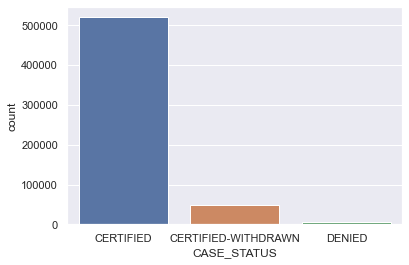

In [42]:
# H1-B Visa by Status
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="CASE_STATUS", data=df)

print("{}% Petitions were Certified".format(len(df[df['CERTIFIED']=='Y'])/float(df.shape[0])*100))
print("{}% Petitions were Denied".format(len(df[df['CERTIFIED']=='N'])/float(df.shape[0])*100))

This is our response variable. It was selected to understand the proportion of the data falling into each class (Certified or Denied).  Almost 98% of the petitions were certified, which means that we may have an issue when predicting case outcome during modeling for the under-represented class.  

Based on this, we need to investigate balancing the data as we move from EDA to classification.

The visualization is appropriate as we are comparing the number of occurrences or frequency for each case status and box plots are good in these situations.

In [34]:
#% of petitions filed by wage level
df["PW_WAGE_LEVEL"].value_counts(normalize = True) * 100

Level I      98.210014
Level II      1.738735
Level III     0.049514
Level IV      0.001737
Name: PW_WAGE_LEVEL, dtype: float64

This table shows the percentage of petitions filed by prevaling wage level category.  The majority (98%) of petitions filed were for Level 1 jobs (annual prevailing wage below $150,000).  

This could indicate job growth or a skills shortage at the mid-management and below levels. If this is the case, it is helpful knowledge for an Employer when developing their org development strategy.  It also plays a significant part in establishing deparatmental budgets and balancing the costs and recruiting time associated with H-1B hires vs. the US workforce.  

A table was selected to clearly see the values of each category.

<Figure size 576x288 with 0 Axes>

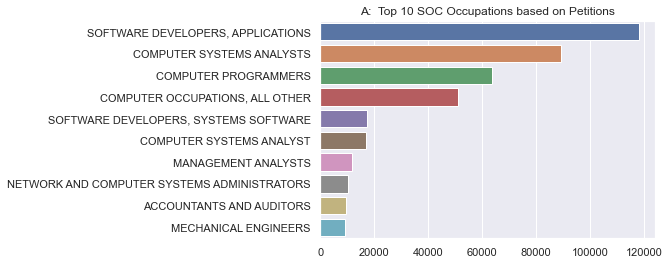

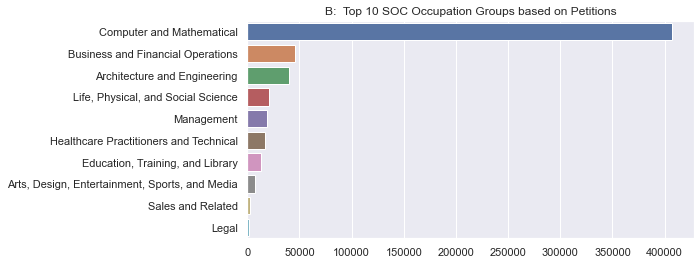

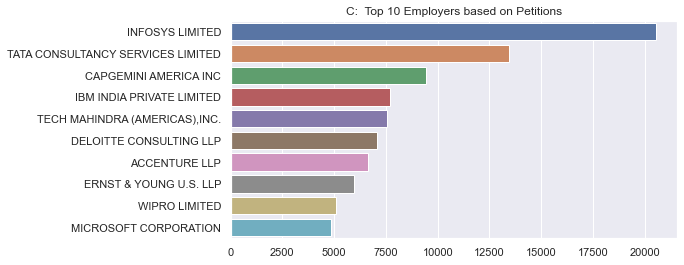

<Figure size 576x288 with 0 Axes>

In [79]:
#Top 10 SOC Occupations based on Petitions
soc = df['SOC_NAME'].value_counts()[:10]
sns.barplot(x= soc.values, y = soc.index)
plt.title("A:  Top 10 SOC Occupations based on Petitions",y=1)
plt.figure(figsize=(8,4))

#Top 10 SOC Occupation Groups based on Petitions
soc = df['SOC_GROUP'].value_counts()[:10]
sns.barplot(x= soc.values, y = soc.index)
plt.title("B:  Top 10 SOC Occupation Groups based on Petitions",y=1)
plt.figure(figsize=(8,4))

#Top 10 companies based on TOTAL_WORKERS
emp = df['EMPLOYER_NAME'].value_counts()[:10]
sns.barplot(x= emp.values, y = emp.index)
plt.title("C:  Top 10 Employers based on Petitions",y=1)
plt.figure(figsize=(8,4))

The Standard Occupational Classification System (SOC Code) is the US government system of classifying occupations. There are approximately 900 SOC Codes. 

Chart A shows the top 10 SOC occupations, based on petitions submitted, 7 of which are computer related. While it is interesting to see which SOC occupations rank at the top, it may be more meaningful to view the data by SOC group, which collapses the 900 SOC Codes into 23 Occupation Groups.

This grouping is reflected in Chart B.  In addition to Computer and Mathmatical fields, the next largest occupational groups fall under Business and Financial Operations and Architecture and Engineering.

These findings are reasonable as the H-1B program is for hiring nonimmigrant aliens as workers in occupations that requires the application of a body of highly specialized knowledge. 

The key findings that the Computer and Mathmatical Group and occupations such as developers, systems analysts and programmers are the top petitioners for certification are further reinforced in Chart C.  Chart C indicates that the top 10 companies seeking H-1B visas are systems related industries.

These attributes were selected in order to understand and gain insight into what types of jobs are included and which emmployers are more likely to pursue H-1Bs.

The visualization is appropriate as it provides a clear comparison between the top ten rankings in each chart.

<Figure size 576x288 with 0 Axes>

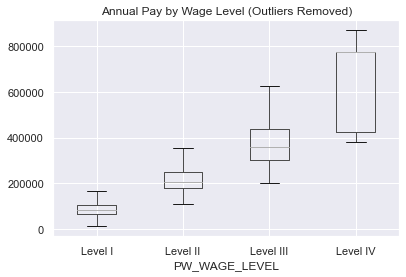

<Figure size 576x288 with 0 Axes>

In [92]:
df.boxplot(column='ANNUALIZED_WAGE_RATE_OF_PAY', by='PW_WAGE_LEVEL', showfliers=False)
plt.title("Annual Pay by Wage Level (Outliers Removed)",y=1)
plt.suptitle("")
plt.figure(figsize=(8,4))


The above chart of Annual Pay by Wage Level (excluding outliers) indicates that Level III and IV have a wide distribution of annual pay and are skewed, while Level I is much more narrow.  The inter-quartile ranges are distinct, indicating stepped progression from one wage level to the next. 

A box plot was selected as this type of graph shows the dispersion of the dataset.

US HEATMAP

### EXPLORE JOINT ATTRIBUTES
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.


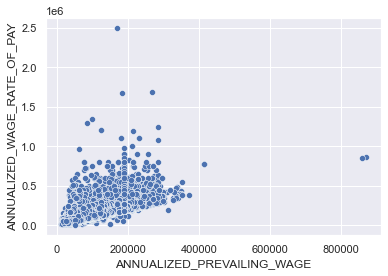

In [97]:
# Relationship between Prevailing Wage and Annualized Wage Rate

#  RERUN WITH OUTLIERS REMOVED DATAFRAME

sns.scatterplot(data = df, x = "ANNUALIZED_PREVAILING_WAGE", y = "ANNUALIZED_WAGE_RATE_OF_PAY")

plt.show()



TBD.... NEED TO TRY TO GET A BETTER VISIUAL OF THE CHART

The above scatterplot of Annualized Wage Rate of Pay and Annualized Prevailing Wage indicates a positive correlation and confirms our belief that employers are using external prevailing wage data when determining a new hire's annual salary.  Also reflected in the chart are a handful of outliers  where annual pay was set outside of the normal range of pay.  

A scatterplot is a good choice for understanding relationships between two continuous variables.

### EXPLORE ATTRIBUTES & CLASS
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).


### NEW FEATURES
Are there other features that could be added to the data or created from existing features? Which ones?

LINDA

### EXCEPTIONAL WORK

You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.